## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [2]:
pip install pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 56.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 56.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 57.1 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12/12 [seaborn]1/12 [seaborn]ib]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

df = pd.read_csv("ICUAdmissions (1).csv")
df['Status'] = df['Status'].map({0:"survived", 1: "dead"})
df.head()

,ID,Status,Age,Sex,Race,Service,Cancer,Renal,Infection,CPR,...,HeartRate,Previous,Type,Fracture,PO2,PH,PCO2,Bicarbonate,Creatinine,Consciousness
0,8,survived,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,1
1,12,survived,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,1
2,14,survived,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,1
3,28,survived,54,0,1,0,0,0,1,0,...,103,0,1,1,0,0,0,0,0,1
4,32,survived,87,1,1,1,0,0,1,0,...,154,1,1,0,0,0,0,0,0,1


### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


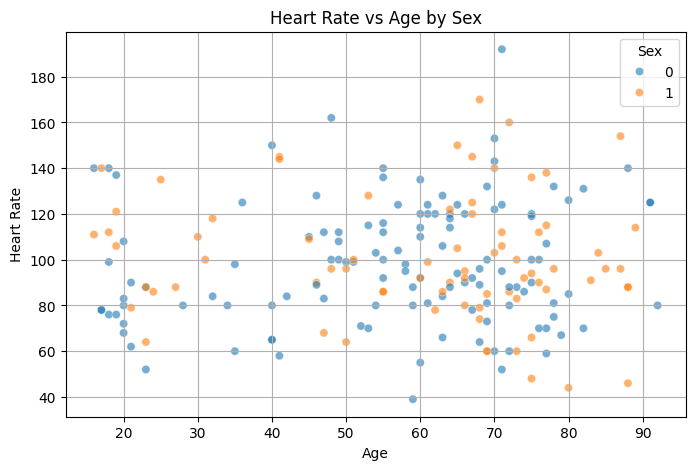

In [5]:
# Example 1: 
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: HeartRate vs Age
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='HeartRate', hue='Sex', alpha=0.6)
plt.title('Heart Rate vs Age by Sex')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()

/tmp/ipykernel_3580/1711241114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Consciousness', y='HeartRate', palette='Set2')


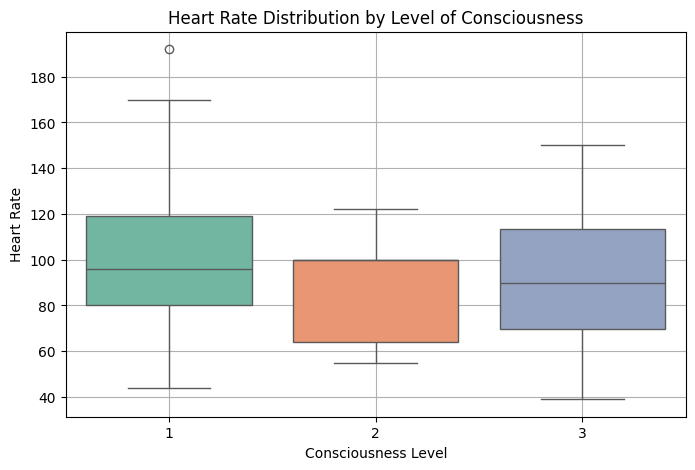

In [6]:
# Example 2: 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Consciousness', y='HeartRate', palette='Set2')
plt.title('Heart Rate Distribution by Level of Consciousness')
plt.xlabel('Consciousness Level')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


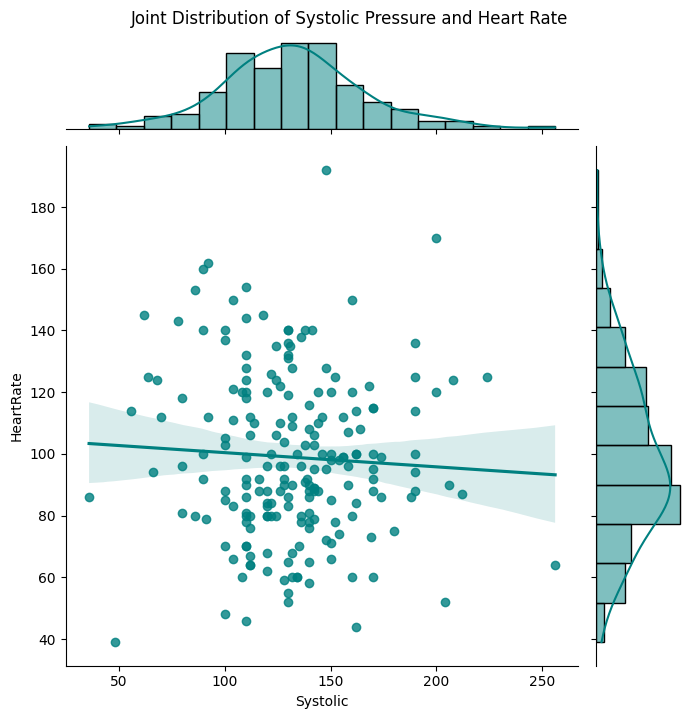

In [7]:
# Example 3: 
sns.jointplot(data=df, x='Systolic', y='HeartRate', kind='reg', height=7, color='teal')
plt.suptitle('Joint Distribution of Systolic Pressure and Heart Rate', y=1.02)
plt.show()


### Basic data visualization choices

numerical variable = continous variable + discrete variable

Here is a general guideline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = df, x = "Status")
plt.title("Status count in ICU Admissions")
plt.show()

In [ ]:
status_count = df["Status"].value_counts(normalize=True)*100
status_count

sns.barplot(x = status_count.index, y = status_count.values)
plt.xlabel("Status of the patients")
plt.ylabel('Percentage')
plt.title('Status percentage in ICU Admissions')
plt.show()

In [ ]:

# Display the percentage values above the bars (optional)
#for i, value in enumerate(status_counts.values):
#    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
#plt.show()

##### What to write about a bar plot

- What is this plot? which features?
- Percentage/count for each group
- Whether there is any clear difference between the bars

EX: The figure is about the number of people survived in the ICU Admissions. In the figure, there are 40 patients dead in the ICU while the rest 160 survived. The difference is clear between the two groups. 

#### One continous: histogram/density plot/boxplot

In [ ]:
sns.histplot(df['HeartRate'], bins = 20, kde = True, kde_kws = {'bw_method': 0.6})
plt.title("Heart rate distribution in ICU Admissions")

In [ ]:
sns.kdeplot(df['HeartRate'], bw_adjust = 0.1, fill = True)
plt.xlabel("Heart Rate")
plt.ylabel('Density')
plt.title('Heart rate distribution in ICU Admissions')
plt.show()

In [ ]:
sns.boxplot(data = df, y = "HeartRate")
plt.title("The boxplot of heart rate in ICU Admissions")
plt.show()

In [ ]:
df['HeartRate'].describe()

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasizes on the distribution of the data
- Boxplot emphasizes the statistics of the data (median, IQR, outlier)
- Boxplot cannot catch the distribution (shape) information, like bi-mode
- Histogram needs to choose the bin number while density plot needs to choose the bandwidth

##### Difference between histogram and bar plot

- Histogram is for the continous variable while bar plot is for the categorical variable
- Historgram is almost always veritical while bar plot can be horizontal
- Historgram usually does not have spaces between the bars while bar plot should have spaces
- Histogram's bar cannot change the order while bar plot's can

##### What to write about a histogram/density plot

- Distribution shape(skewness, mode)
- Majority of the data (Typical value: mean $\pm$ sd)
- Potential outlier

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

Histogram: This is the distribution of heart rate in the ICU admissions. In the figure, the heart rate has a uni-mode but it is slightly skewed to the right, which may indicates that there exists a potential outlier with large value. The typical value is within the range 98.9 $\pm$ 26.8 = [72.1, 125.7]

##### What to write about a box plot

- can comment on the skewness but not the shape
- majority of the data (IQR)
- potential outlier

boxplot: The figure is the boxplot of heart rate in ICU admissions. In the figure, the heart rate seems to slightly skewed to the right with a potential large value outlier. The IQR is from 80 to 118.25. 

#### Two continous: scatter plot

In [ ]:
sns.scatterplot(x = 'Age', y = 'HeartRate', data = df, alpha = 0.7)
plt.title("The scatter plot between age and heart rate in ICU admissions")
plt.show()

##### What to write about a scatter plot

- trend (linear, nonlinear, no trend)
- outlier (if any)
- cluster (if any)

EX: The figure is a scatter plot to show the relationship between age and heart rate in ICU admissions. In the figure, it seems that there is no clear trend between age and heart rate. There is no points that are far away from the others and no clear clustering pattern. 


#### Some bad example of the scatter plot

In [ ]:
sns.scatterplot(x = 'Status', y = 'HeartRate', data = df, alpha = 0.7)
plt.title("The scatter plot between status and heart rate in ICU admissions")
plt.show()

In [ ]:
plt.plot(df['Age'], df['HeartRate'])
plt.title("Line plot of age and heart rate")
plt.show()

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side density plot

In [ ]:
sns.boxplot(x = 'Status', y = 'HeartRate', data = df, color = "white")
plt.title("Side-by-side boxplot of heart rate across status")
plt.show()

In [ ]:
sns.kdeplot(data = df, x = 'HeartRate', hue = 'Status', common_norm=False, fill = True)
plt.title('Side-by-side density plot for heart rate across status')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- Highlight the comparison
- For the boxplot, declare whether the boxes are overlapped

Boxplot: The figure is the side-by-side boxplot of heart rate across different survival group. In the figure, the boxes are overlapped, which means there might not be statistically significant difference between two groups. 


#### Two categorical: side-by-side bar plot

In [ ]:
df['CPR'] = df['CPR'].map({0: 'no', 1: 'yes'})

In [ ]:
sns.countplot(x = 'Status', hue = 'CPR', data = df)
plt.title('Side-by-side bar plot for CPR and Status')
plt.show()

In [ ]:
proportion_table = pd.crosstab(df['Status'], df['CPR'])
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize='all')
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize='columns')
proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize='index')
proportion_table

In [ ]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.title("Stacked bar plot of CPR use percentage across the survival groups")
plt.show()

##### What to write about a side-by-side bar plot

- Highlight the comparison

EX: The figure is the stacked bar plot of the percetange of CPR use across different groups. In the figure, the distribution of CPR use is clearly different between survival group and non-survival group. In the non-survival group, there are much higher percentage of CPR use than the survival group, which indicating the there might exist a relation between CPR use and survival status. 

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [13]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [14]:
# Summary of nulls
print(titanic_data.isnull().sum())

# Drop 'deck' 
titanic_data = titanic_data.drop(columns=['deck'])

# Fill numerical nulls with median
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())
titanic_data['fare'] = titanic_data['fare'].fillna(titanic_data['fare'].median())

# Fill categorical nulls with mode
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

# Confirm cleanup
print(titanic_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


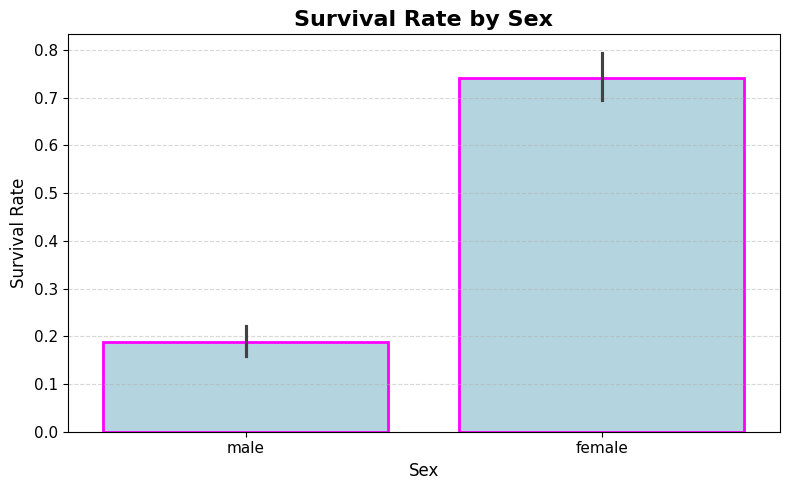

In [19]:
# bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    data=titanic_data,
    x='sex',
    y='survived',
    color='lightblue',     # Single color
    edgecolor='magenta',   # Edge color
    linewidth=2
)

# Titles and labels
plt.title('Survival Rate by Sex', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3580/4238059973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=titanic_data, x='survived', y='age', palette='Set2')


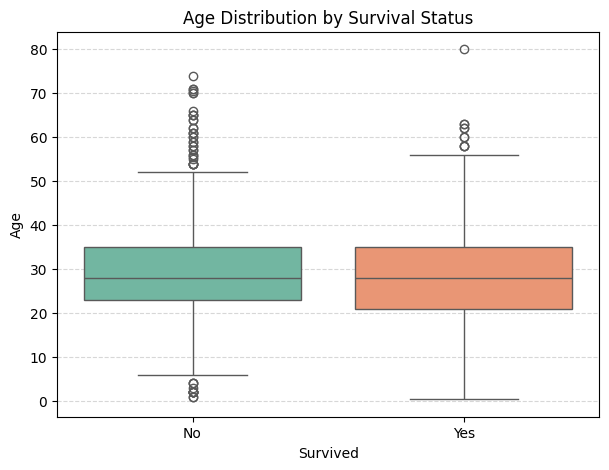

In [21]:
# Box plot: Age vs Survival
plt.figure(figsize=(7, 5))
sns.boxplot(data=titanic_data, x='survived', y='age', palette='Set2')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

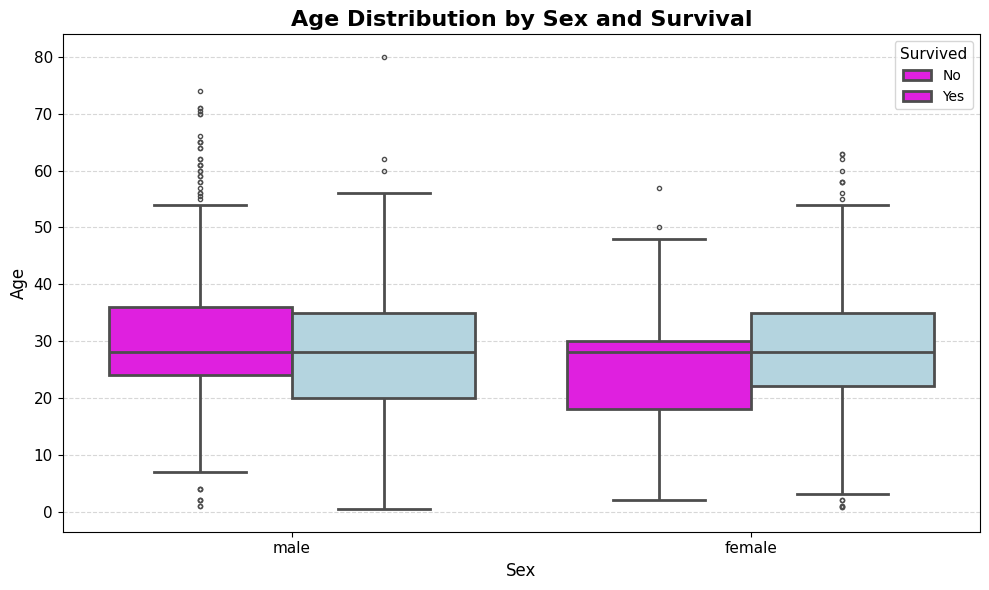

In [ ]:
# Make a side by side boxplot

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=titanic_data,
    x='sex',
    y='age',
    hue='survived',
    palette=['magenta', 'lightblue'],
    linewidth=2,
    fliersize=3
)

# Titles and labels
plt.title('Age Distribution by Sex and Survival', fontsize=16, weight='bold')
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Customize legend
plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=10, title_fontsize=11, loc='upper right')

# Ticks and grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Layout adjustment
plt.tight_layout()
plt.show()


#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?